In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mydata = pd.read_csv('student-dataset.csv')
print(mydata)

   rollno      name   c  cpp  java  total  percentage grade
0       1    Ayesha  75   86    89  250.0       83.33     A
1       2   Saadiya  78   87    88  253.0       84.33     A
2       3  Tarannum  84   85    89  258.0         NaN   NaN
3       4      Uzma  75   84    78  237.0       79.00     B
4       5    Saniya  55   41    44  140.0       46.67     D
5       6    Alfiya  75   76    77    NaN       76.00   NaN
6       7  Tanzeela  48   82    81  211.0       70.33     B
7       8    Simran  79   71    72  222.0       74.00     B
8       9   Shaheen  61   57    88  206.0         NaN     C
9      10   Munizah  91   92    93    NaN       92.00     A


In [8]:
newdf = mydata.dropna()
newdf

,rollno,name,c,cpp,java,total,percentage,grade
0,1,Ayesha,75,86,89,250.0,83.33,A
1,2,Saadiya,78,87,88,253.0,84.33,A
3,4,Uzma,75,84,78,237.0,79.00,B
4,5,Saniya,55,41,44,140.0,46.67,D
6,7,Tanzeela,48,82,81,211.0,70.33,B
7,8,Simran,79,71,72,222.0,74.00,B


In [3]:
mydata

,rollno,name,c,cpp,java,total,percentage,grade
0,1,Ayesha,75,86,89,250.0,83.33,A
1,2,Saadiya,78,87,88,253.0,84.33,A
2,3,Tarannum,84,85,89,258.0,NaN,NaN
3,4,Uzma,75,84,78,237.0,79.00,B
4,5,Saniya,55,41,44,140.0,46.67,D
5,6,Alfiya,75,76,77,NaN,76.00,NaN
6,7,Tanzeela,48,82,81,211.0,70.33,B
7,8,Simran,79,71,72,222.0,74.00,B
8,9,Shaheen,61,57,88,206.0,NaN,C
9,10,Munizah,91,92,93,NaN,92.00,A


In [4]:
mydata['total'] = mydata['c'] + mydata['cpp']+mydata['java']
mydata['percentage'] = mydata['total']/3

def calculateGrade(i):
    if i >= 80:
        return 'A'
    elif i >= 70:
          return 'B'
    elif i >= 60:
          return 'C'
    else: return 'D'

mydata['grade'] = mydata['percentage'].apply(calculateGrade)
    
mydata

,rollno,name,c,cpp,java,total,percentage,grade
0,1,Ayesha,75,86,89,250,83.333333,A
1,2,Saadiya,78,87,88,253,84.333333,A
2,3,Tarannum,84,85,89,258,86.000000,A
3,4,Uzma,75,84,78,237,79.000000,B
4,5,Saniya,55,41,44,140,46.666667,D
5,6,Alfiya,75,76,77,228,76.000000,B
6,7,Tanzeela,48,82,81,211,70.333333,B
7,8,Simran,79,71,72,222,74.000000,B
8,9,Shaheen,61,57,88,206,68.666667,C
9,10,Munizah,91,92,93,276,92.000000,A


In [25]:
gradewisecount = mydata.groupby('grade')['rollno'].count()
gradewisecount

grade
A    4
B    4
C    1
D    1
Name: rollno, dtype: int64

<bound method Series.keys of grade
A    4
B    4
C    1
D    1
Name: rollno, dtype: int64>

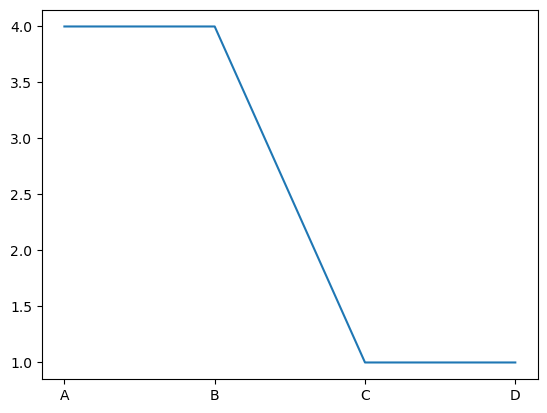

In [40]:
plt.plot(gradewisecount)

In [42]:
gcount = mydata['grade'].value_counts()

Text(0.5, 1.0, 'GRADE-WISE COUNT OF STUDENTS')

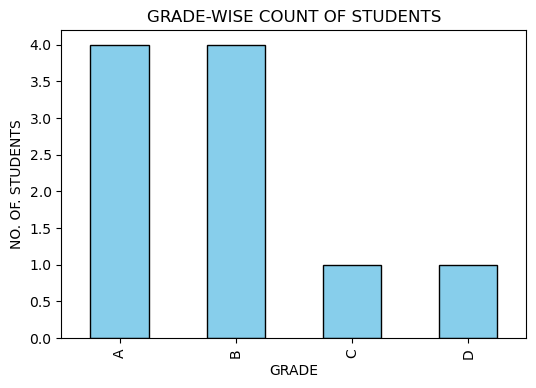

In [48]:
plt.figure(figsize=(6,4))
gradewisecount.plot(kind='bar',color='skyblue',edgecolor='black')
plt.xlabel('GRADE')
plt.ylabel('NO. OF. STUDENTS')
plt.title('GRADE-WISE COUNT OF STUDENTS')

In [50]:
subject_wise_average = mydata[['c','cpp','java']].mean()
subject_wise_average

c       72.1
cpp     76.1
java    79.9
dtype: float64

Text(0.5, 1.0, 'SUBJECT WISE AVERAGE RESULT')

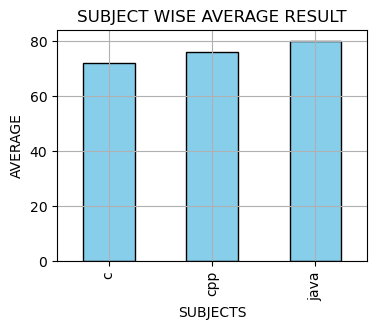

In [55]:
plt.figure(figsize = (4,3))
subject_wise_average.plot(kind='bar',color='skyblue',edgecolor='black')
plt.grid(True)
plt.xlabel('SUBJECTS')
plt.ylabel('AVERAGE')
plt.title('SUBJECT WISE AVERAGE RESULT')

In [56]:
mydata

,rollno,name,c,cpp,java,total,percentage,grade
0,1,Ayesha,75,86,89,250,83.333333,A
1,2,Saadiya,78,87,88,253,84.333333,A
2,3,Tarannum,84,85,89,258,86.000000,A
3,4,Uzma,75,84,78,237,79.000000,B
4,5,Saniya,55,41,44,140,46.666667,D
5,6,Alfiya,75,76,77,228,76.000000,B
6,7,Tanzeela,48,82,81,211,70.333333,B
7,8,Simran,79,71,72,222,74.000000,B
8,9,Shaheen,61,57,88,206,68.666667,C
9,10,Munizah,91,92,93,276,92.000000,A


In [64]:
top_five=mydata.nlargest(5,'percentage')
top_five['name']

9     Munizah
2    Tarannum
1     Saadiya
0      Ayesha
3        Uzma
Name: name, dtype: object

<BarContainer object of 5 artists>

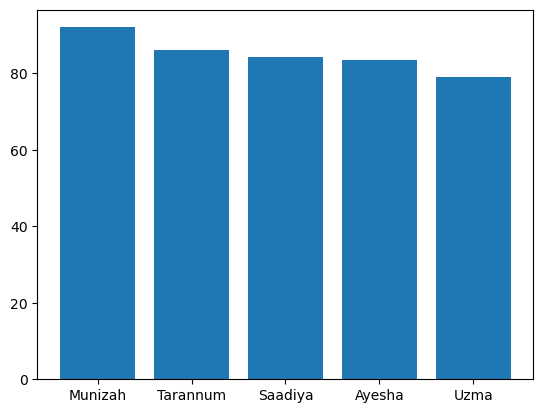

In [72]:
plt.bar(top_five['name'],top_five['percentage'])


<Axes: >

<Figure size 400x300 with 0 Axes>

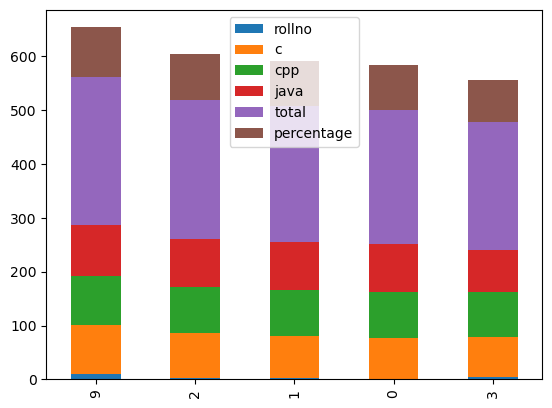

In [75]:
plt.figure(figsize=(4,3))
top_five.plot(kind='bar',stacked=True)